# Packages and utils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
X = np.load("data/ex7_X.npy")

In [3]:
X[0:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

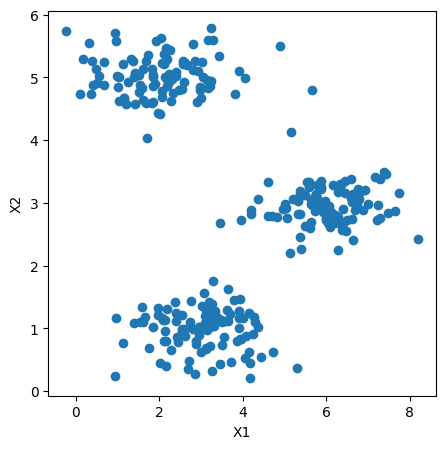

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# 1 - Implementing K-means

***K-means clustering*** is an iterative procedure that:

    * Initialize centroids
    * Then repeatly, Refind centroids:
        * Label every data point with centroid
        * recompute centroids based assignment

In [5]:
def label_data(X, centroids):
    
    n_points, n_features = X.shape
    n_centroids = len(centroids)
    y = np.zeros(n_points, dtype=int)
    for i in range(n_points):
        distance = []
        for j in range(n_centroids):
            dij = np.linalg.norm(X[i]-centroids[j])
            distance.append(dij)
        min_dij = np.argmin(distance)
        y[i] = min_dij 
    return y

In [6]:
# test label_data()
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]], dtype=float)

# Find closest centroids using initial_centroids
idx = label_data(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[0:3])

First three elements in idx are: [0 2 1]


In [7]:
def update_centroids(X, y, n_centroids):
    centroids = np.zeros((n_centroids, X.shape[1]))
    for j in range(n_centroids):
        centroid_mask = (y == j)
        centroids[j] = np.mean(X[centroid_mask], axis=0)
    return centroids

In [8]:
centroids = update_centroids(X, idx, 3)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [9]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

# 2 - K-means on a sample dataset

K-Means iteration 0/99
K-Means iteration 1/99
K-Means iteration 2/99
K-Means iteration 3/99
K-Means iteration 4/99
K-Means iteration 5/99
K-Means iteration 6/99
K-Means iteration 7/99
K-Means iteration 8/99
K-Means iteration 9/99
K-Means iteration 10/99
K-Means iteration 11/99
K-Means iteration 12/99
K-Means iteration 13/99
K-Means iteration 14/99
K-Means iteration 15/99
K-Means iteration 16/99
K-Means iteration 17/99
K-Means iteration 18/99
K-Means iteration 19/99
K-Means iteration 20/99
K-Means iteration 21/99
K-Means iteration 22/99
K-Means iteration 23/99
K-Means iteration 24/99
K-Means iteration 25/99
K-Means iteration 26/99
K-Means iteration 27/99
K-Means iteration 28/99
K-Means iteration 29/99
K-Means iteration 30/99
K-Means iteration 31/99
K-Means iteration 32/99
K-Means iteration 33/99
K-Means iteration 34/99
K-Means iteration 35/99
K-Means iteration 36/99
K-Means iteration 37/99
K-Means iteration 38/99
K-Means iteration 39/99
K-Means iteration 40/99
K-Means iteration 41/99
K-

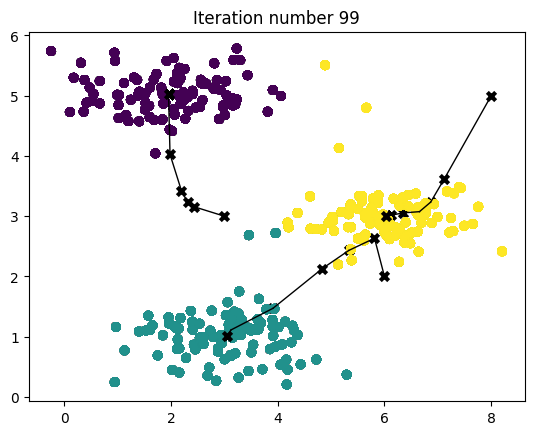

In [10]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = label_data(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = update_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

max_iters = 100
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# 3 - Initialization

In [11]:
def initial_centroids_from_randomed_sample(X, n_centroids):
    
    randomed_ind = np.random.permutation(X.shape[0])
    centroids = X[randomed_ind[0:n_centroids]]
    
    return centroids

In [12]:
centroids = initial_centroids_from_randomed_sample(X, 3)
print(centroids)

[[2.40304747 5.08147326]
 [7.75660559 3.15604465]
 [6.27376271 2.24256036]]


# 4 - Image compression with K-means

In [26]:
from PIL import Image

img = Image.open('data/car.jpg')
rsize_img = img.resize((np.array(img.size)/5).astype(int))
rsize_img = np.asarray(rsize_img) 

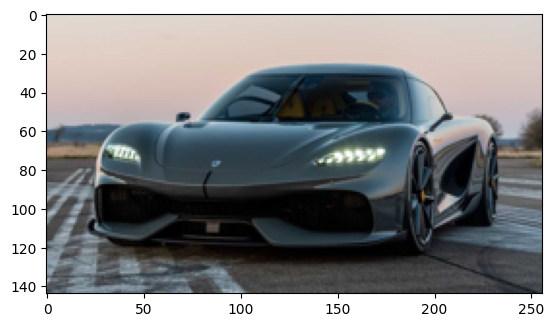

In [28]:
plt.imshow(rsize_img)
plt.show()

In [29]:
print(rsize_img.shape)

(144, 256, 3)


In [31]:
rsize_img = rsize_img / 255

X = np.reshape(rsize_img, (144*256, 3))
X.shape

(36864, 3)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


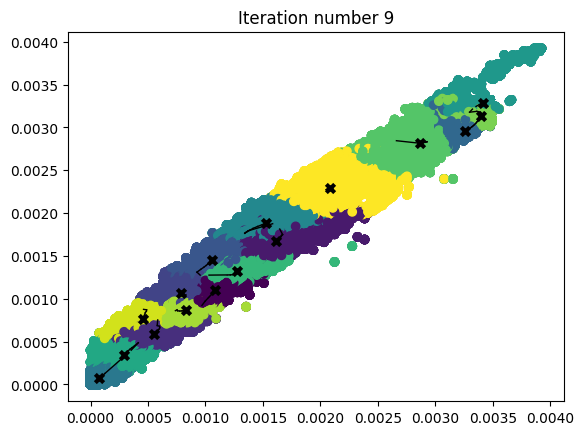

In [32]:
K = 
iters = 10

initial_centroids = initial_centroids_from_randomed_sample(X, K)
centroids, idx = run_kMeans(X, initial_centroids, iters, plot_progress=True)

In [38]:
print(centroids)
print(idx[0:10])

[[1.08634411e-03 1.09866001e-03 1.10948859e-03]
 [1.59933104e-03 1.66580706e-03 1.68623308e-03]
 [5.43043043e-04 5.86183069e-04 6.18187392e-04]
 [7.84313725e-04 1.07466088e-03 1.24263440e-03]
 [1.06257426e-03 1.46530833e-03 1.72232747e-03]
 [3.25105507e-03 2.94643957e-03 2.87610455e-03]
 [7.56936639e-05 7.11519672e-05 7.81664082e-05]
 [1.55698199e-03 1.90125686e-03 2.12527883e-03]
 [3.41280219e-03 3.27426276e-03 3.15683495e-03]
 [2.84817592e-04 3.31468249e-04 3.69371455e-04]
 [1.27070710e-03 1.32883053e-03 1.36480091e-03]
 [2.85266334e-03 2.82207715e-03 2.87033827e-03]
 [3.39260889e-03 3.12449201e-03 2.99911314e-03]
 [8.27385744e-04 8.67460289e-04 8.98450827e-04]
 [4.62088140e-04 7.64626807e-04 9.54897325e-04]
 [2.09463487e-03 2.29785039e-03 2.41902642e-03]]
[8 8 8 8 8 8 8 8 8 8]


In [40]:
X_recovered = centroids[idx, :]
X_recovered.shape

(36864, 3)

In [43]:
X_recovered = np.reshape(X_recovered, rsize_img.shape)
X_recovered.shape

(144, 256, 3)

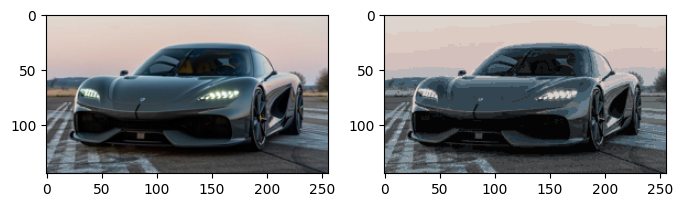

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.imshow(rsize_img*255)

ax2.imshow(X_recovered*255)